In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
df= pd.read_csv('/content/Wine_clust .csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
df.shape

(178, 13)

In [33]:

# Checking for any null values
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
# Applying elbow method to determine optimal n_clusters
from sklearn.cluster import KMeans
WCSS =[]
for i in range (1,13):
  kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
  kmeans.fit(df)
  WCSS.append(kmeans.inertia_)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

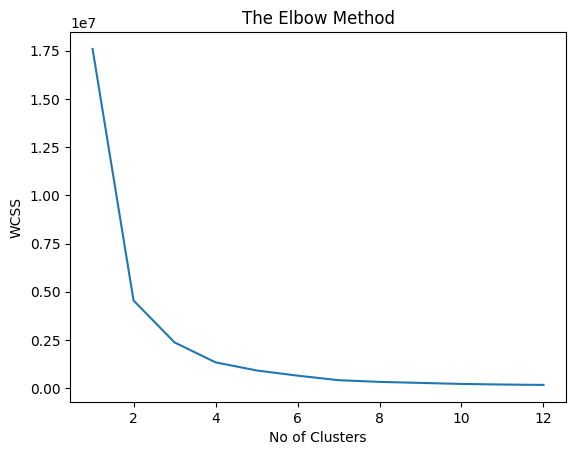

In [35]:
plt.plot(range(1,13),WCSS)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.plot

<function matplotlib.pyplot.show(close=None, block=None)>

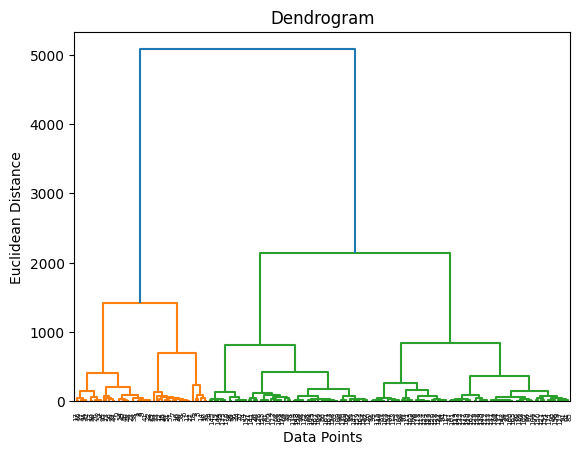

In [36]:
# Plotting a dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show

In [37]:
from sklearn.cluster import AgglomerativeClustering
ahc = AgglomerativeClustering(n_clusters=3,affinity = 'euclidean', linkage = 'ward')
y_ahc = ahc.fit_predict(df)
y_ahc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [38]:
from sklearn.metrics import silhouette_score
sil_ahc = silhouette_score(df,y_ahc)
sil_ahc

0.5644796401732071

In [39]:
ahc = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean', linkage = 'ward')
y_ahc1 = ahc.fit_predict(df)
y_ahc1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [40]:
sil_ahc = silhouette_score(df,y_ahc1)
sil_ahc

0.5644796401732071

In [41]:
cluster_labels = pd.DataFrame(y_ahc1)

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
new_df = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])

In [43]:
new_df["Cluster Labels"] = cluster_labels

In [44]:
new_df

,PC1,PC2,Cluster Labels
0,318.562979,21.492131,0
1,303.097420,-5.364718,0
2,438.061133,-6.537309,0
3,733.240139,0.192729,0
4,-11.571428,18.489995,2
...,...,...,...
173,-6.980211,-4.541137,2
174,3.131605,2.335191,2
175,88.458074,18.776285,2
176,93.456242,18.670819,2


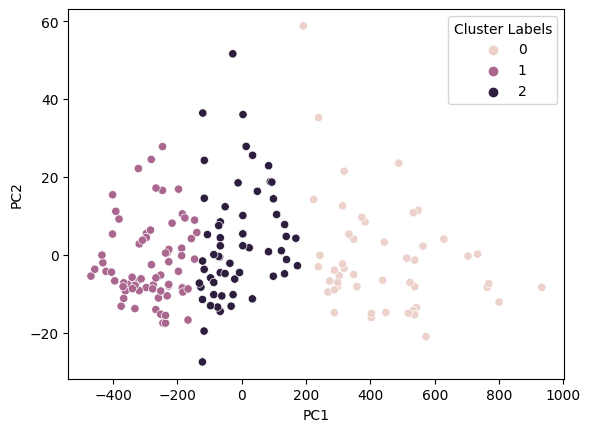

In [45]:
sns.scatterplot(data=new_df, x="PC1", y="PC2", hue="Cluster Labels")
plt.show()